**Họ và Tên: Đào Thanh Thiện**

**MSSV: 1712782**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**ĐỌC VÀ TIỀN XỮ LÝ DỮ LIỆU**

In [19]:
#Đọc dữ liệu
data = pd.read_csv("Space_Corrected.csv")
df = data.copy()

In [20]:
#Dữ liệu gốc đặt tên cột bị dư 1 dấu cách, ta chuyển về tên đúng để dễ làm việc hơn
df.rename(columns={" Rocket": "Rocket"}, inplace = True)
df['Rocket'] = pd.to_numeric(df['Rocket'],errors='coerce')

#df.rename(columns={"Status Rocket": "Status_Rocket"}, inplace = True)
#df.rename(columns={"Status Mission": "Status_Mission"}, inplace = True)

In [21]:
#Ta thấy dữ liệu có 2 cột "Unnamed: 0" và "Unnamed: 0.1" có cùng số giá trị với cột số thứ tự của pandas 
#nên ta tiến hành bỏ 2 cột này, để rút gọn dữ liệu
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)

#Cột Rocket có nhiều dữ liệu trống, ta đặt các dữ liệu này trở về 0
df['Rocket'] = df['Rocket'].fillna(0)

#Thêm cột Country, lấy dữ liệu từ cột location
df['Country'] = df['Location'].apply(lambda x: x.strip().split(', ')[-1])

#Thêm cột Year, lấy dữ liệu từ cột Datum
df['Datum'] = pd.to_datetime(df['Datum'],utc=True).dt.date
df['Year'] = pd.to_datetime(df['Datum']).dt.year

**1. Mức độ thành công của các lần phóng**

Tổng số lần phóng của các công ty

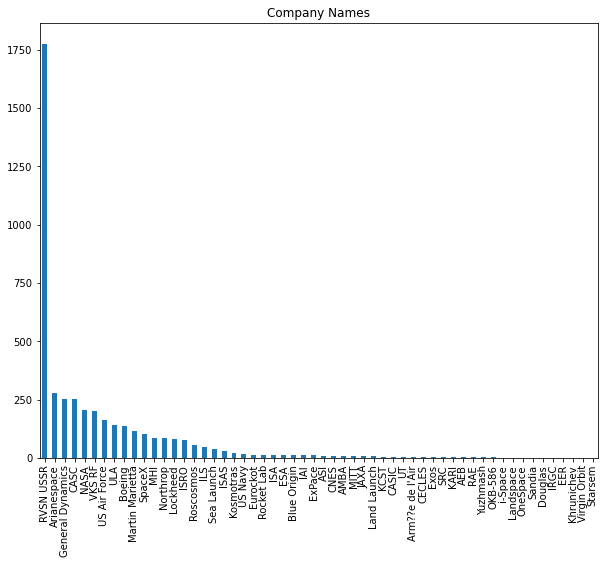

In [5]:
dataComCount = df['Company Name'].value_counts()
plt.figure(figsize=(10,8))
dataComCount.plot.bar(title='Company Names')

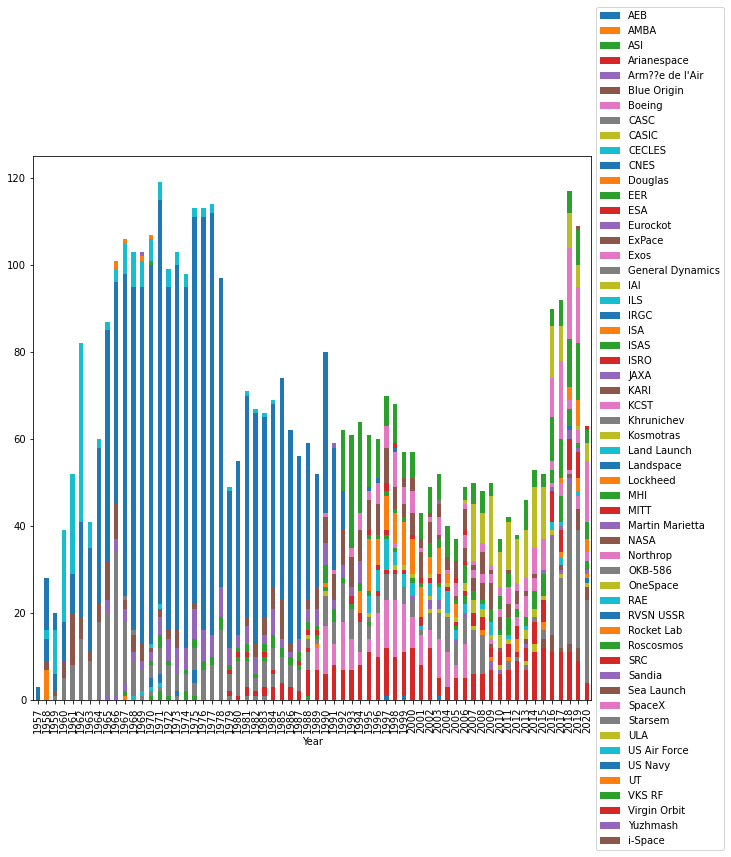

In [12]:
df1 = df.groupby(['Year','Company Name'])['Year'].count().unstack('Company Name').fillna(0)
df1[df1.columns].plot(kind='bar', stacked=True,figsize=(10, 10)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

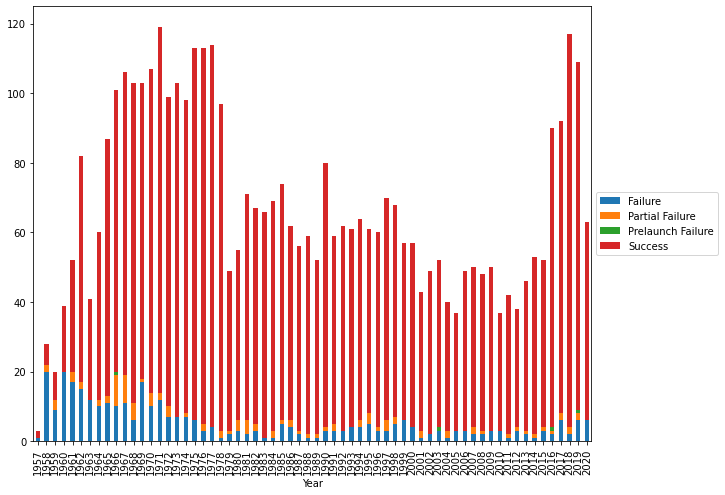

In [7]:
df2 = df.groupby(['Year','Status Mission'])['Year'].count().unstack('Status Mission').fillna(0)
df2[df2.columns].plot(kind='bar', stacked=True,figsize=(10,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

**2. SỐ TIỀN MÀ CÁC CÔNG TY BỎ RA**

Tổng số tiền các công ty bỏ ra 

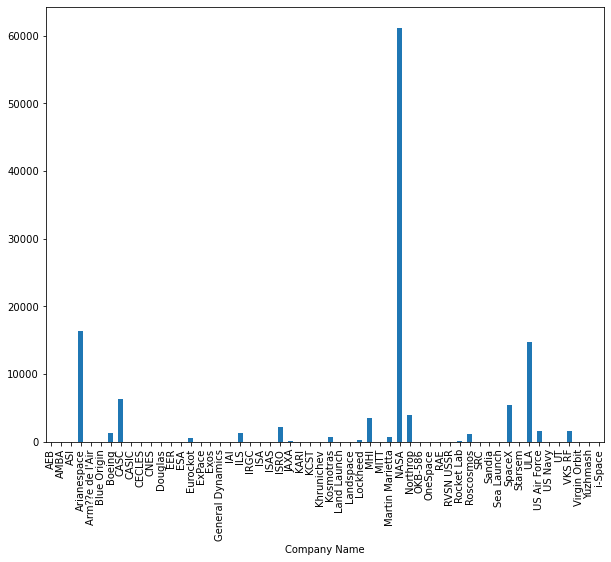

In [23]:
SumDataComRoc = df.groupby(['Company Name']).sum()['Rocket'].dropna()
plt.figure(figsize=(10,8))
SumDataComRoc.plot.bar()

Số tiền trung bình mà các công ty bỏ ra cho một lần phóng tên lửa

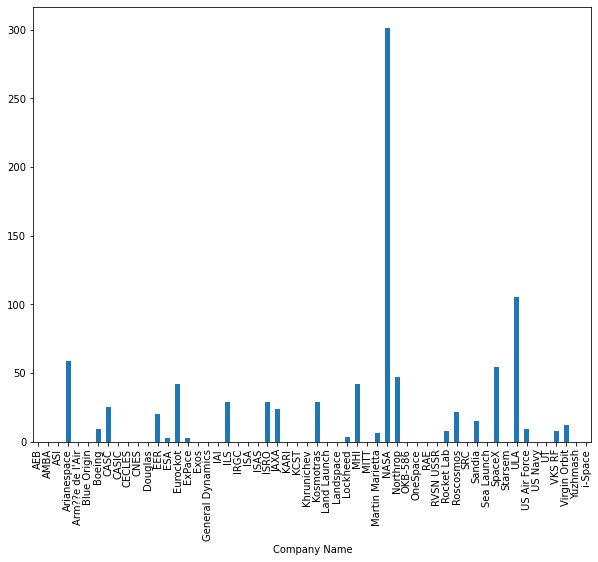

In [24]:
MeanDataComRoc = df.groupby(['Company Name']).mean()['Rocket'].dropna()
plt.figure(figsize=(10,8))
MeanDataComRoc.plot.bar()

**Do dữ liệu có nhiều dòng không có dữ liệu nên ta chỉ biểu diễn các biến có dữ liệu.**

**Vì thiếu dữ liệu nên biểu diễn trên chỉ mang tính tham khảo, tính chính xác không cao*